# ___Feature Extraction___

_As it turns out, many Machine Learning algorithms and almost all Deep Learning Architectures are incapable of processing strings or plain text in their raw form. They require numbers as inputs to perform any sort of job, be it classification, regression etc. in broad terms. And with the huge amount of data that is present in the text format, it is imperative to extract knowledge out of it and build applications. Therefore, text to numerical feature conversion is important._

## ___Bag of Words___

### ___What is the Bag-of-Words method?___

_It is a method of extracting essential features from row text so that we can use it for machine learning models. We call it “Bag” of words because we discard the order of occurrences of words. A bag of words model converts the raw text into words, and it also counts the frequency for the words in the text. In summary, a bag of words is a collection of words that represent a sentence along with the word count where the order of occurrences is not relevant._

_For instance:_

_Sentences:_
* _Jim and Pam traveled by bus._
* _The train was late._
* _The flight was full. Traveling by flight is expensive._

___a. Creating a basic structure:___
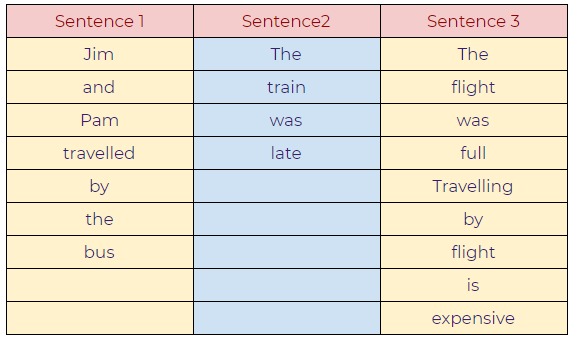


___b. Words with frequencies:___

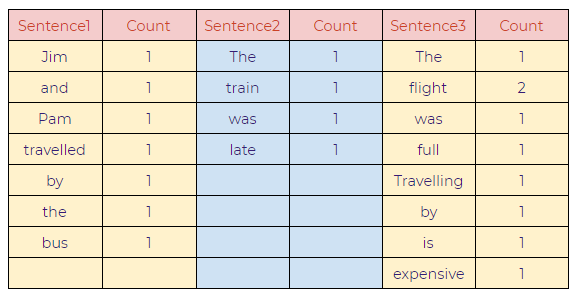

___c. Combining all the words:___
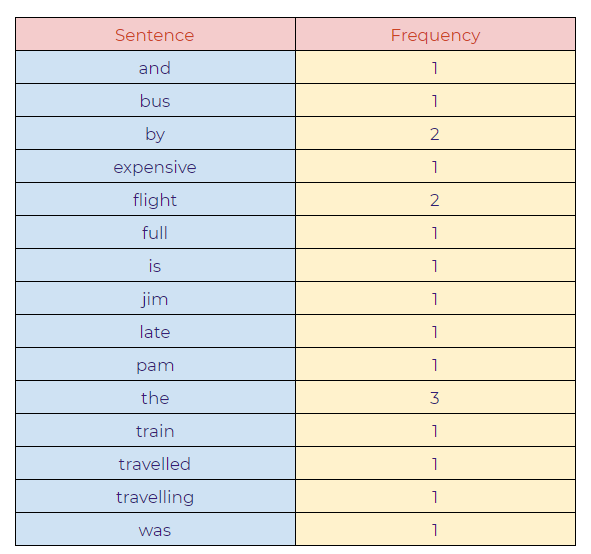

___d. Final model:___
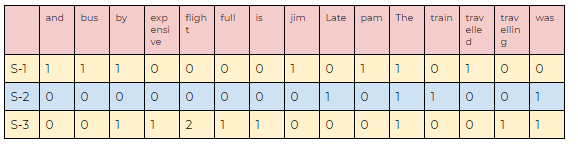

### ___NLTK___

In [15]:
# Python3 code for preprocessing text 
import nltk 
# nltk.download('punkt')

import re 
import numpy as np 
  
sentences = 'Jim and Pam traveled by bus: The train was late The flight was full. Traveling by flight is expensive'
# execute the text here as : 
# text = """ # place text here  """ 
dataset = nltk.sent_tokenize(sentences) 
for i in range(len(dataset)): 
    dataset[i] = dataset[i].lower() 
    dataset[i] = re.sub(r'\W', ' ', dataset[i]) 
    dataset[i] = re.sub(r'\s+', ' ', dataset[i]) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PiyushSin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
dataset

['jim and pam traveled by bus the train was late the flight was full ',
 'traveling by flight is expensive']

In [17]:
# Creating the Bag of Words model 
word2count = {} 
for data in dataset: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1

In [18]:
word2count

{'jim': 1,
 'and': 1,
 'pam': 1,
 'traveled': 1,
 'by': 2,
 'bus': 1,
 'the': 2,
 'train': 1,
 'was': 2,
 'late': 1,
 'flight': 2,
 'full': 1,
 'traveling': 1,
 'is': 1,
 'expensive': 1}

In [20]:
import heapq 
freq_words = heapq.nlargest(100, word2count, key=word2count.get)

freq_words

['by',
 'the',
 'was',
 'flight',
 'jim',
 'and',
 'pam',
 'traveled',
 'bus',
 'train',
 'late',
 'full',
 'traveling',
 'is',
 'expensive']

In [22]:
X = [] 
for data in dataset: 
    vector = [] 
    for word in freq_words: 
        if word in nltk.word_tokenize(data): 
            vector.append(1) 
        else: 
            vector.append(0) 
    X.append(vector) 
X = np.asarray(X) 
X

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]])

### ___sklearn___

In [8]:
# Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

```CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)```

In [2]:
sentences = ['Jim and Pam traveled by bus:', 'The train was late', 'The flight was full. Traveling by flight is expensive']

cv = CountVectorizer()

bow = cv.fit_transform(sentences).toarray()
bow

array([[1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1]], dtype=int64)

In [3]:
cv.vocabulary_

{'jim': 7,
 'and': 0,
 'pam': 9,
 'traveled': 12,
 'by': 2,
 'bus': 1,
 'the': 10,
 'train': 11,
 'was': 14,
 'late': 8,
 'flight': 4,
 'full': 5,
 'traveling': 13,
 'is': 6,
 'expensive': 3}

In [5]:
cv.get_feature_names()

['and',
 'bus',
 'by',
 'expensive',
 'flight',
 'full',
 'is',
 'jim',
 'late',
 'pam',
 'the',
 'train',
 'traveled',
 'traveling',
 'was']

In [9]:
# show document feature vectors
pd.DataFrame(bow, columns=cv.get_feature_names())

,and,bus,by,expensive,flight,full,is,jim,late,pam,the,train,traveled,traveling,was
0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1
2,0,0,1,1,2,1,1,0,0,0,1,0,0,1,1


In [10]:
### BAG OF N-GRAMS

# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(sentences)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,and pam,by bus,by flight,flight is,flight was,full traveling,is expensive,jim and,pam traveled,the flight,the train,train was,traveled by,traveling by,was full,was late
0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
2,0,0,1,1,1,1,1,0,0,1,0,0,0,1,1,0


### ___Keras___

_Once the Tokenizer has been fit on training data, it can be used to encode documents in the train or test datasets. The texts to matrix() function on the Tokenizer can be used to create one vector per document provided per input. The length of the vectors is the total size of the vocabulary. This function provides a suite of standard bag-of-words model text encoding schemes that can be provided via a mode argument to the function. The modes available include:_

* ___binary___ _: Whether or not each word is present in the document. This is the default._

* ___count___ _: The count of each word in the document._

* ___tfidf___ _: The Text Frequency-Inverse DocumentFrequency (TF-IDF) scoring for each word in the document._

* ___freq___ _: The frequency of each word as a ratio of words within each document._

In [12]:
# from keras.preprocessing.text import Tokenizer

# ## Step 1: Determine the Vocabulary

# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(sentences)
# print(f'Vocabulary: {list(tokenizer.word_index.keys())}')
 
# ## Step 2: Count

# vectors = tokenizer.texts_to_matrix(sentences, mode='count')
# print(vectors)


ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

### ___Applications___
* _Natural language processing._
* _Information retrieval from documents._
* _Classifications of documents._

### ___Limitations___
* ___Semantic meaning___ _: It does not consider the semantic meaning of a word. It ignores the context in which the word is used._
* ___Vector size___ _: For large documents, the vector size increase, which may result in higher computational time._
* ___Preprocessing___ _: In preprocessing, we need to perform data cleansing before using it._
* _If the new sentences contain new words, then our vocabulary size would increase and thereby, the length of the vectors would increase too._
* _Additionally, the vectors would also contain many 0s, thereby resulting in a sparse matrix (which is what we would like to avoid)_

## ___TF-IDF___

_TF-IDF stands for `Term Frequency — Inverse Document Frequency`, which is a scoring measure generally used in information retrieval (IR) and summarization. The TF-IDF score shows how important or relevant a term is in a given document._

### ___The intuition behind TF and IDF___
_If a particular word appears multiple times in a document, then it might have higher importance than the other words that appear fewer times (TF). At the same time, if a particular word appears many times in a document, but it is also present many times in some other documents, then maybe that word is frequent, so we cannot assign much importance to it. (IDF)._

_Example:_
* ___Sentence 1___ _: This is the first document._
* ___Sentence 2___ _: This document is the second document._

### ___TF: Term Frequency___

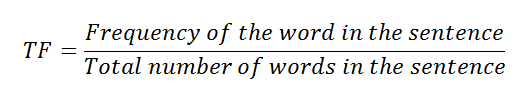

#### ___Represent the words of the sentences in the table.___
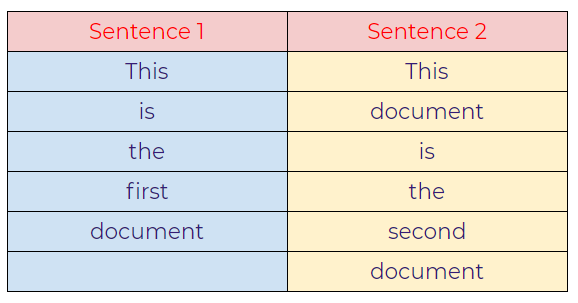

#### ___Displaying the frequency of words.___

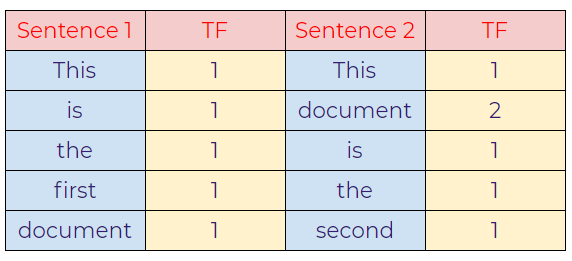

#### ___Calculating TF using a formula.___

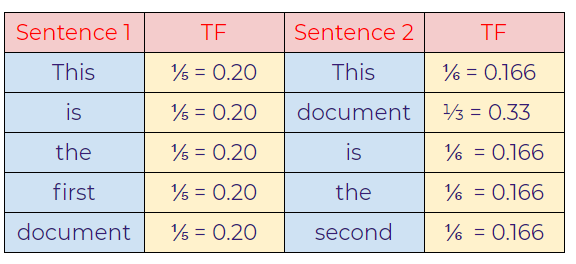

### ___IDF: Inverse Document Frequency___

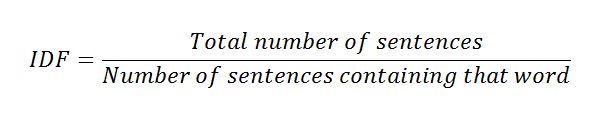

#### ___Calculating IDF values from the formula.___

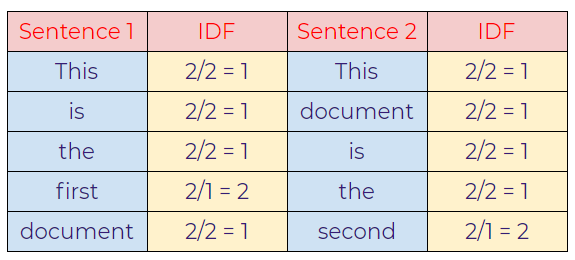

#### ___Calculating TF-IDF.___
_TF-IDF is the multiplication of TF*IDF._

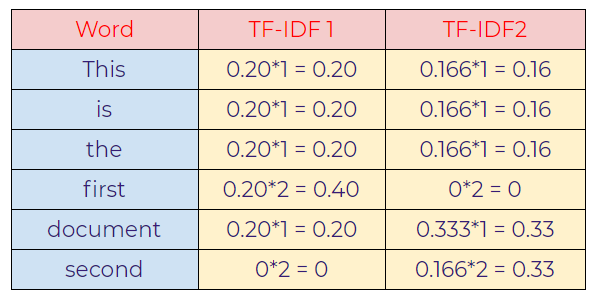

_In this case, notice that the import words that discriminate both the sentences are “first” in sentence-1 and “second” in sentence-2 as we can see, those words have a relatively higher value than other words._

_However, there any many variations for smoothing out the values for large documents. The most common variation is to use a log value for TF-IDF. Let’s calculate the TF-IDF value again by using the new IDF value._

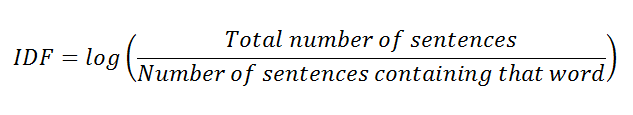

#### ___Calculating IDF value using log.___

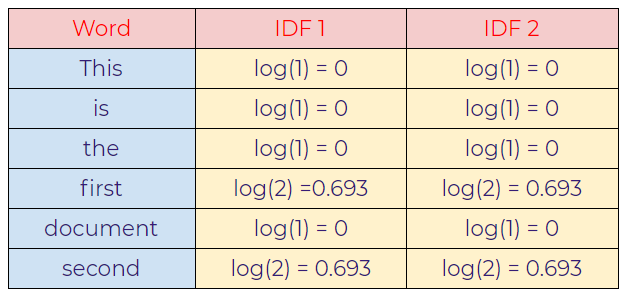

#### ___Calculating TF-IDF.___

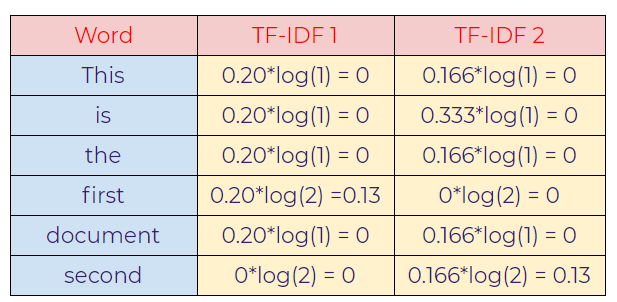

_As seen above, “first” and “second” values are important words that help us to distinguish between those two sentences.
Now that we saw the basics of TF-IDF. Next, we are going to use the sklearn library to implement TF-IDF in Python. A different formula calculates the actual output from our program. First, we will see an overview of our calculations and formulas, and then we will implement it in Python._

### ___Actual Calculations___
#### ___Term Frequency (TF)___
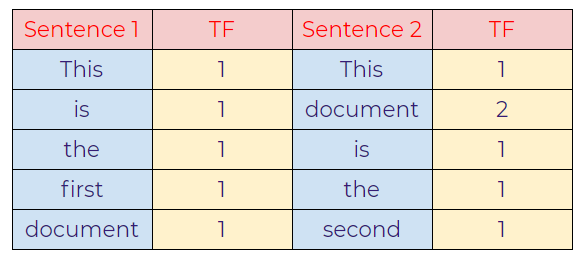

#### ___Inverse Document Frequency (IDF)___
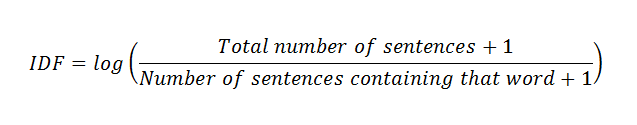

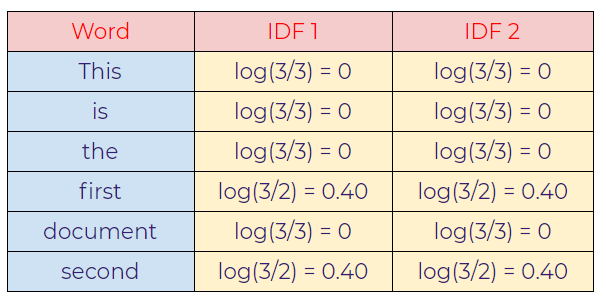

#### ___Calculating final TF-IDF values___
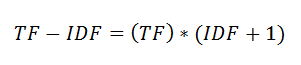

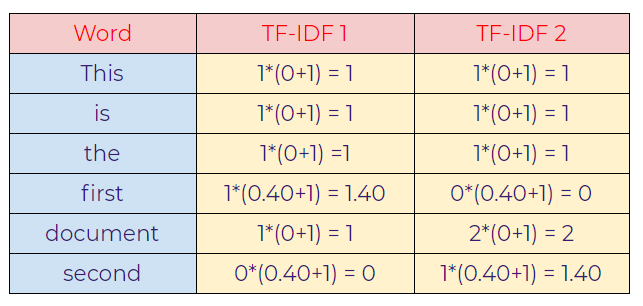

### ___sklearn___

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentences = ['This is the first document','The document is the second document']

vectorizer = TfidfVectorizer(norm = None)

X = vectorizer.fit_transform(sentences).toarray()

print(vectorizer.vocabulary_)

print(vectorizer.get_feature_names())


{'this': 5, 'is': 2, 'the': 4, 'first': 1, 'document': 0, 'second': 3}
['document', 'first', 'is', 'second', 'the', 'this']


In [25]:
print(X)

[[1.         1.40546511 1.         0.         1.         1.40546511]
 [2.         0.         1.         1.40546511 2.         0.        ]]


```TfidfVectorizer = CountVectorizer + TfidfTransformer```

### ___Keras___

In [ ]:
# from keras.preprocessing.text import Tokenizer

# ## Step 1: Determine the Vocabulary

# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(sentences)
# print(f'Vocabulary: {list(tokenizer.word_index.keys())}')
 
# ## Step 2: Count

# vectors = tokenizer.texts_to_matrix(sentences, mode='tfidf')
# print(vectors)

## ___Hashing Vectorizing___

_Counts and frequencies can be very useful, but one limitation of these methods is that the vocabulary can become very large. This, in turn, will require large vectors for encoding documents and impose large requirements on memory and slow down algorithms. A clever work around is to use a one way hash of words to convert them to integers. The clever part is that no vocabulary is required and you can choose an arbitrary-long fixed length vector. A downside is that the hash is a one-way function so there is no way to convert the encoding back to a word._

In [26]:
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

In [27]:
vectorizer = HashingVectorizer(n_features=20)
vector = vectorizer.transform(text)

In [28]:
print(vector.shape)

(1, 20)


In [29]:
print(vector.toarray())

[[ 0.          0.          0.          0.          0.          0.33333333
   0.         -0.33333333  0.33333333  0.          0.          0.33333333
   0.          0.          0.         -0.33333333  0.          0.
  -0.66666667  0.        ]]


## ___N-Grams___

_N-grams of texts are extensively used in text mining and natural language processing tasks. They are basically a set of co-occuring words within a given window and when computing the n-grams you typically move one word forward (although you can move X words forward in more advanced scenarios)._

_For example, for the sentence "The cow jumps over the moon". If N=2 (known as bigrams), then the ngrams would be:_
```
the cow
cow jumps
jumps over
over the
the moon
```
_So you have 5 n-grams in this case. Notice that we moved from the->cow to cow->jumps to jumps->over, etc, essentially moving one word forward to generate the next bigram._

_If N=3, the n-grams would be:_
```
the cow jumps
cow jumps over
jumps over the
over the moon
```
_So you have 4 n-grams in this case. When N=1, this is referred to as unigrams and this is essentially the individual words in a sentence. When N=2, this is called bigrams and when N=3 this is called trigrams. When N>3 this is usually referred to as four grams or five grams and so on._

___How many N-grams in a sentence?___

_If X=Num of words in a given sentence K, the number of n-grams for sentence K would be:_



___What are N-grams used for?___

_N-grams are used for a variety of different task. For example, when developing a language model, n-grams are used to develop not just unigram models but also bigram and trigram models. Google and Microsoft have developed web scale n-gram models that can be used in a variety of tasks such as spelling correction, word breaking and text summarization._

In [30]:
import re

def generate_ngrams(text,n):

    # split sentences into tokens
    tokens=re.split("\\s+",text)
    ngrams=[]

    # collect the n-grams
    for i in range(len(tokens)-n+1):
        temp=[tokens[j] for j in range(i,i+n)]
        ngrams.append(" ".join(temp))

    return ngrams

In [31]:
generate_ngrams("The cow jumps over the moon", 2)

['The cow', 'cow jumps', 'jumps over', 'over the', 'the moon']

### ___NLTK___

In [36]:
from nltk import ngrams

sentence = '_start_ this is ngram _generation_'
my_ngrams = ngrams(sentence.split(), 3)

for i in my_ngrams:
    print(i)

('_start_', 'this', 'is')
('this', 'is', 'ngram')
('is', 'ngram', '_generation_')


In [39]:
from nltk.tokenize import word_tokenize
from nltk import ngrams

def get_ngrams(text, n):
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]

In [40]:
get_ngrams('_start_ this is ngram _generation_',3)

['_start_ this is', 'this is ngram', 'is ngram _generation_']